# **Homework 3**

Hayk Khachatryan

**Note:** I have tried to import **ExponentialAFTFitter**, however, it didn't work because of that part is missing.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
from lifelines.utils import k_fold_cross_validation

In [6]:
file_path = 'telco.csv'
loaded_data = pd.read_csv(file_path)

In [7]:
loaded_data

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,No
996,997,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,No
997,998,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,No
998,999,Zone 3,70,49,Unmarried,18,87,High school degree,No,Female,Yes,No,Yes,Plus service,No


## **Parametric models**

In [8]:
def process_data(input_data):
    processed_data = input_data.copy()
    processed_data.drop(['ID'], axis=1, inplace=True)

    categorical_cols = ['region', 'retire', 'marital', 'ed', 'gender', 'voice', 'internet', 'custcat', 'churn', 'forward']
    processed_data = pd.get_dummies(processed_data, columns=categorical_cols, drop_first=True)

    return processed_data

In [9]:
processed_data = process_data(loaded_data)
processed_data

,tenure,age,address,income,region_Zone 2,region_Zone 3,retire_Yes,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,gender_Male,voice_Yes,internet_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn_Yes,forward_Yes
0,13,44,9,64,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,11,33,7,136,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,1
2,68,52,24,116,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,33,33,12,33,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,23,30,9,30,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,0,27,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
996,7,34,2,22,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
997,67,59,40,944,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1
998,70,49,18,87,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1


**0** stays for **NO**, **1** for **YES**

In [10]:
weibull_model = WeibullAFTFitter()
log_norm_model = LogNormalAFTFitter()
log_logistic_model = LogLogisticAFTFitter()

In [11]:
weibull = weibull_model.fit(processed_data, duration_col='tenure', event_col='churn_Yes')
weibull_prediction = weibull.predict_survival_function(processed_data).T
weibull_prediction_avg = weibull_prediction.mean()
weibull.print_summary()

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2023-11-30 18:12:45 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
        age                               0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
        custcat_E-service                 0.98       2.66       0.16             0.67             1.28                 1.96                 3.61
        custcat_Plus service              0.74       2.10       0.19             0.36             1.12                 1.44                 3.06
        custcat_Total service             1.00       2.71       0.21             0.58             1.41                 1.78                 4.11
        ed_Did not complete high school   0.44       1.55       0.19             0.06             0.82                 1.06                 2.27
        ed_High school degree             0.32       1.38       0.15             0.03             0.61                 1.03                 1.83
        ed_Post-undergraduate degree      0.22       1.25       0.19            -0.15             0.60                 0.86                 1.82
        ed_Some college                   0.25       1.29       0.14            -0.03             0.54                 0.97                 1.71
        forward_Yes                      -0.10       0.91       0.15            -0.39             0.19                 0.68                 1.21
        gender_Male                       0.00       1.00       0.10            -0.20             0.21                 0.82                 1.23
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.77       0.46       0.14            -1.04            -0.50                 0.35                 0.61
        marital_Unmarried                -0.35       0.71       0.10            -0.55            -0.14                 0.58                 0.87
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.19                 0.73                 1.21
        region_Zone 3                     0.12       1.12       0.13            -0.13             0.36                 0.87                 1.44
        retire_Yes                        0.17       1.19       0.52            -0.85             1.19                 0.43                 3.30
        voice_Yes                        -0.34       0.72       0.15            -0.63            -0.04                 0.53                 0.96
        Intercept                         2.78      16.14       0.27             2.25             3.31                 9.48                27.47
rho_    Intercept                         0.17       1.19       0.05             0.07             0.27                 1.08                 1.32

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ address                             0.00  4.69 <0.005      18.47
        age                                 0.00  4.12 <0.005      14.69
        custcat_E-service                   0.00  6.28 <0.005      31.44
        custcat_Plus service                0.00  3.83 <0.005      12.95
        custcat_Total service       

In [12]:
log_norm = log_norm_model.fit(processed_data, duration_col='tenure', event_col='churn_Yes')
log_norm_prediction = log_norm.predict_survival_function(processed_data).T
log_norm_prediction_avg = log_norm_prediction.mean()
log_norm.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-30 18:12:45 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005  

In [13]:
log_logistic = log_logistic_model.fit(processed_data, duration_col='tenure', event_col='churn_Yes')
log_logistic_prediction = log_logistic.predict_survival_function(processed_data).T
log_logistic_prediction_avg = log_logistic_prediction.mean()
log_logistic.print_summary()

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2023-11-30 18:12:47 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.04       2.83       0.17             0.72             1.36                 2.05                 3.91
       custcat_Plus service              0.86       2.37       0.21             0.45             1.27                 1.57                 3.57
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.34
       ed_Did not complete high school   0.43       1.54       0.20             0.04             0.82                 1.05                 2.28
       ed_High school degree             0.34       1.40       0.15             0.03             0.64                 1.03                 1.89
       ed_Post-undergraduate degree     -0.02       0.98       0.22            -0.45             0.40                 0.64                 1.49
       ed_Some college                   0.24       1.27       0.16            -0.06             0.55                 0.94                 1.73
       forward_Yes                      -0.19       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.04       1.04       0.11            -0.18             0.26                 0.84                 1.29
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.80       0.45       0.14            -1.07            -0.52                 0.34                 0.60
       marital_Unmarried                -0.45       0.64       0.11            -0.66            -0.23                 0.52                 0.80
       region_Zone 2                    -0.05       0.95       0.14            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.11       1.12       0.14            -0.15             0.38                 0.86                 1.46
       retire_Yes                        0.06       1.06       0.48            -0.87             1.00                 0.42                 2.71
       voice_Yes                        -0.40       0.67       0.16            -0.72            -0.08                 0.49                 0.92
       Intercept                         2.33      10.33       0.28             1.78             2.89                 5.95                17.93
beta_  Intercept                         0.34       1.40       0.05             0.24             0.44                 1.27                 1.55

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ address                             0.00  4.42 <0.005      16.60
       age                                 0.00  4.67 <0.005      18.36
       custcat_E-service                   0.00  6.30 <0.005      31.62
       custcat_Plus service                0.00  4.13 <0.005      14.74
       custcat_Total service               0.00  5.00 <0.005

In [14]:
print(f'Log-Normal AIC: {log_norm.AIC_}')
print(f'Log-Logistic AIC: {log_logistic.AIC_}')
print(f'Weibull AIC: {weibull.AIC_}')

Log-Normal AIC: 2954.0240102517128
Log-Logistic AIC: 2956.2085614433336
Weibull AIC: 2964.3432480838806


In [15]:
scores = {'Log-normal': log_norm.AIC_, 'Log-logistic': log_logistic.AIC_, 'Weibull': weibull.AIC_}
best_model = min(scores, key=scores.get)
print(f'\nThe best model based on AIC scores is: \033[1m{best_model}\033[0m')


The best model based on AIC scores is: Log-normal


In addition to examining the AIC score and visualizations, several other crucial factors should be taken into account when selecting the most suitable model.

The complexity of a model can be gauged by considering the number of parameters. For instance, the exponential model has only one parameter, whereas the Weibull model has two, and both the Log-Normal and Log-Logistic models have three.

Another criterion to consider is the Hazard Rate. In this context, the Weibull model is favored over the others due to its capability to capture both increasing and decreasing hazard rates.

Despite these considerations, I will place my confidence in the AIC score and opt for the Log-Normal model, which has demonstrated the best performance.

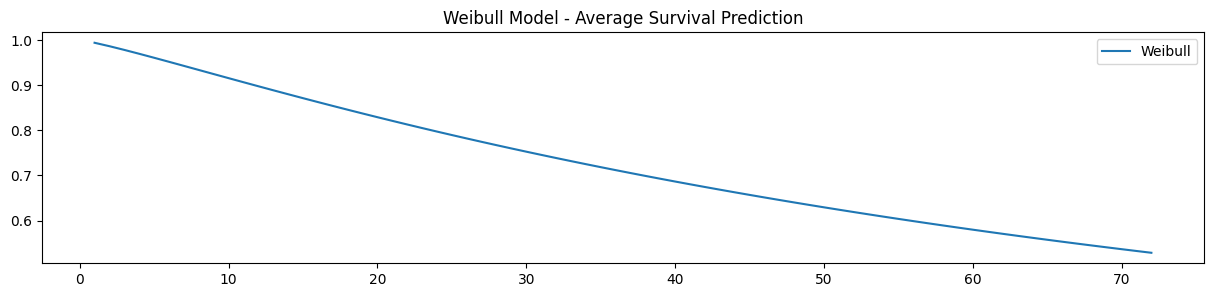

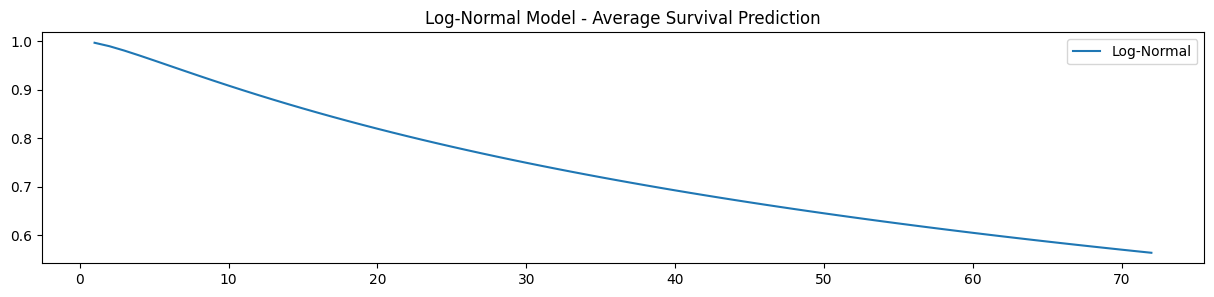

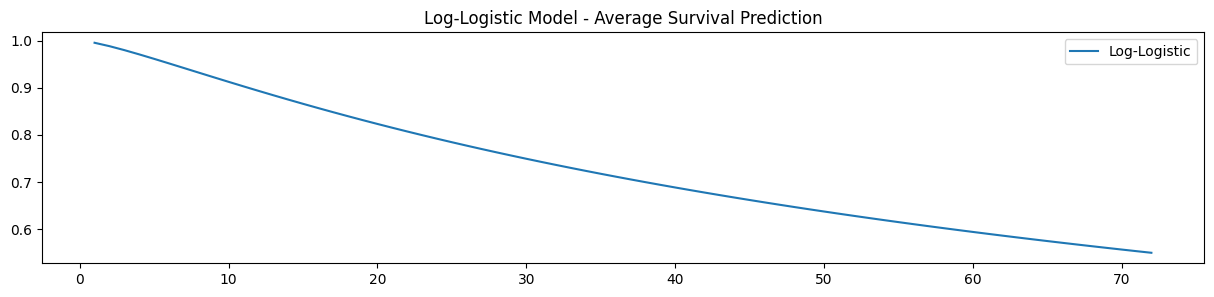

In [16]:
# Plot for the Weibull model
plt.figure(figsize=(15, 3))
plt.plot(weibull_prediction_avg, label='Weibull')
plt.legend()
plt.title('Weibull Model - Average Survival Prediction')
plt.show()

# Plot for the Log-Normal model
plt.figure(figsize=(15, 3))
plt.plot(log_norm_prediction_avg, label='Log-Normal')
plt.legend()
plt.title('Log-Normal Model - Average Survival Prediction')
plt.show()

# Plot for the Log-Logistic model
plt.figure(figsize=(15, 3))
plt.plot(log_logistic_prediction_avg, label='Log-Logistic')
plt.legend()
plt.title('Log-Logistic Model - Average Survival Prediction')
plt.show()

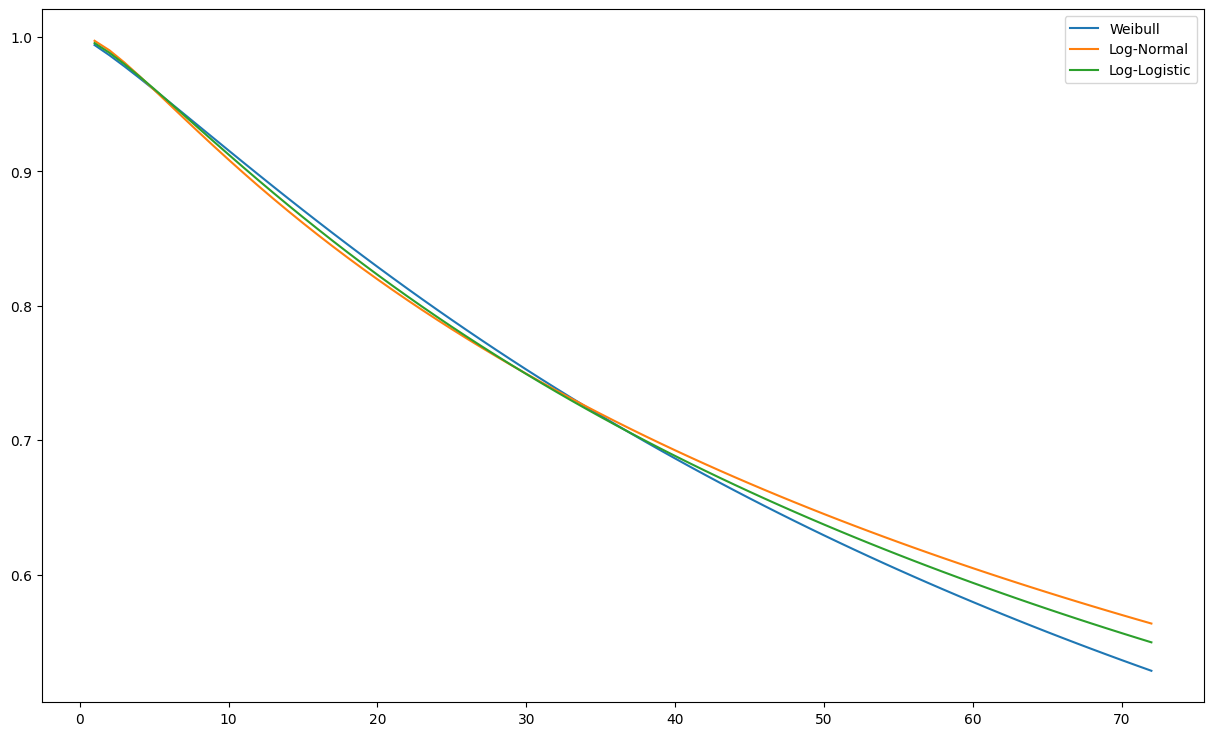

In [17]:
# Plot the average survival predictions
plt.figure(figsize=(15, 9))
plt.plot(weibull_prediction_avg, label='Weibull')
plt.plot(log_norm_prediction_avg, label='Log-Normal')
plt.plot(log_logistic_prediction_avg, label='Log-Logistic')
plt.legend()
plt.show()

In [18]:
print(processed_data.columns)


Index(['tenure', 'age', 'address', 'income', 'region_Zone 2', 'region_Zone 3',
       'retire_Yes', 'marital_Unmarried', 'ed_Did not complete high school',
       'ed_High school degree', 'ed_Post-undergraduate degree',
       'ed_Some college', 'gender_Male', 'voice_Yes', 'internet_Yes',
       'custcat_E-service', 'custcat_Plus service', 'custcat_Total service',
       'churn_Yes', 'forward_Yes'],
      dtype='object')


In [19]:
# List of columns considered significant
significant_columns = ["address", "age", "internet_Yes", "marital_Unmarried", "tenure", "churn_Yes",
                       "custcat_E-service", "custcat_Plus service", "custcat_Total service", "voice_Yes"]

selected_data = processed_data[significant_columns]
selected_data

,address,age,internet_Yes,marital_Unmarried,tenure,churn_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,voice_Yes
0,9,44,0,0,13,1,0,0,0,0
1,7,33,0,0,11,1,0,0,1,1
2,24,52,0,0,68,0,0,1,0,0
3,12,33,0,1,33,1,0,0,0,0
4,9,30,0,0,23,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,39,0,1,10,0,0,0,0,0
996,2,34,0,1,7,0,0,0,0,0
997,40,59,1,1,67,0,0,0,1,1
998,18,49,0,1,70,0,0,1,0,1


In [20]:
# Fit the Log-Normal model
log_norm = log_norm_model.fit(selected_data, duration_col='tenure', event_col='churn_Yes')
log_norm_prediction = log_norm.predict_survival_function(selected_data).T
log_norm_prediction_avg = log_norm_prediction.mean()
log_norm.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-30 18:13:27 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.79
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

## **CLV**

In [21]:
# Creating a copy of Log-Normal model predictions for Customer Lifetime Value (CLV) calculation
clv_data = log_norm_prediction.copy()

In [28]:
# Setting up parameters for CLV calculation
margin = 1500
sequence = range(1, len(clv_data.columns) + 1)
r = 0.2

In [23]:
# Adjusting the CLV data based on the discount rate
for i in sequence:
    clv_data.loc[:, i] = clv_data.loc[:, i] / ((1 + r / 12) ** (sequence[i - 1] - 1))

In [24]:
# Calculating CLV for each customer
clv_data["CLV"] = margin * clv_data.sum(axis=1)
clv_data

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,CLV
0,0.999688,0.989880,0.978868,0.966893,0.954194,0.940967,0.927370,0.913526,0.899533,0.885469,...,0.363526,0.357889,0.352351,0.346911,0.341567,0.336317,0.331159,0.326092,0.321112,43421.920852
1,0.999736,0.990127,0.979439,0.967868,0.955620,0.942870,0.929761,0.916405,0.902892,0.889296,...,0.373555,0.367869,0.362283,0.356792,0.351396,0.346093,0.340880,0.335756,0.330720,44012.968135
2,0.999999,0.991724,0.983496,0.975307,0.967152,0.959028,0.950934,0.942869,0.934834,0.926828,...,0.561230,0.555839,0.550497,0.545202,0.539956,0.534757,0.529605,0.524500,0.519441,53279.464095
3,0.997985,0.982516,0.963596,0.942708,0.920782,0.898406,0.875956,0.853676,0.831726,0.810209,...,0.236111,0.231513,0.227024,0.222639,0.218356,0.214171,0.210084,0.206089,0.202185,34882.879434
4,0.999870,0.990870,0.981213,0.970970,0.960245,0.949137,0.937733,0.926110,0.914328,0.902440,...,0.413868,0.408046,0.402314,0.396671,0.391115,0.385646,0.380260,0.374959,0.369738,46287.751605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.996036,0.975404,0.950272,0.923094,0.895196,0.867318,0.839884,0.813132,0.787198,0.762150,...,0.187415,0.183429,0.179547,0.175765,0.172079,0.168488,0.164988,0.161575,0.158249,30970.665732
996,0.995073,0.972135,0.944405,0.914717,0.884526,0.854605,0.825374,0.797056,0.769766,0.743549,...,0.172052,0.168286,0.164620,0.161053,0.157579,0.154197,0.150903,0.147695,0.144569,29633.260935
997,0.999991,0.991651,0.983268,0.974822,0.966311,0.957738,0.949110,0.940436,0.931725,0.922986,...,0.518455,0.512743,0.507093,0.501505,0.495977,0.490511,0.485104,0.479757,0.474468,51473.533992
998,0.999923,0.991186,0.982008,0.972409,0.962449,0.952190,0.941692,0.931008,0.920183,0.909257,...,0.440037,0.434174,0.428396,0.422700,0.417087,0.411554,0.406100,0.400725,0.395427,47681.088097


In [26]:
# Adding the calculated CLV values to the original data
loaded_data["CLV"] = clv_data.CLV

In [39]:
# Analyzing CLV based on different groupings
print(loaded_data.groupby(["ed", "age"])[["CLV"]].mean())
print(loaded_data.groupby(["marital", "age"])[["CLV"]].mean())
print(loaded_data.groupby("gender")[["CLV"]].mean())
print(loaded_data.groupby("voice")[["CLV"]].mean())
print(loaded_data.groupby("marital")[["CLV"]].mean())
print(loaded_data.groupby("region")[["CLV"]].mean())
print(loaded_data.groupby("custcat")[["CLV"]].mean())
print(loaded_data.groupby("retire")[["CLV"]].mean())
print(loaded_data.groupby("ed")[["CLV"]].mean())

                             CLV
ed             age              
College degree 22   27311.353844
               23   29274.838187
               24   27157.069972
               25   27732.630799
               26   27490.171335
...                          ...
Some college   66   50893.109059
               68   45656.697833
               69   51445.080721
               70   50475.536117
               76   53929.194949

[232 rows x 1 columns]
                        CLV
marital   age              
Married   19   40376.365145
          20   26818.549260
          21   31808.326181
          22   32690.229515
          23   30717.509941
...                     ...
Unmarried 72   54325.878756
          73   48955.756526
          75   54348.250076
          76   53948.708911
          77   54249.525944

[112 rows x 1 columns]
                 CLV
gender              
Female  41126.506961
Male    41326.642952
                CLV
voice              
No     42575.461690
Yes    38127.14

## **Report**

The Customer Lifetime Value (CLV) analysis provides valuable insights into the revenue potential associated with different customer segments based on various demographic and behavioral attributes. Let's focus on the education (ed) and marital status features for interpretation.

The analysis reveals that customers with a College degree exhibit varying CLV values across different age groups. For instance, the CLV tends to fluctuate throughout the age range, suggesting potential changes in spending behavior or customer loyalty as individuals progress through their education and career stages. This nuanced understanding allows businesses to tailor marketing strategies or loyalty programs based on the specific needs and characteristics of customers at different educational levels. Additionally, the CLV analysis by marital status unveils distinctions between Married and Unmarried customers. Married customers generally exhibit higher CLV values, implying potentially greater long-term revenue from this demographic. This insight could guide businesses in developing targeted services or promotions to enhance customer retention within the married segment.

Furthermore, the CLV breakdown by education level provides a comprehensive view of the revenue potential associated with customers having different educational backgrounds. Notably, customers who did not complete high school show the highest CLV, followed by those with a High school degree. This surprising trend may prompt businesses to explore the specific needs or preferences of these customer segments, potentially uncovering opportunities for tailored marketing strategies or product offerings. Understanding the CLV associated with education levels empowers businesses to allocate resources effectively and optimize customer engagement strategies based on the unique characteristics and behaviors of each education segment.

In [40]:
# Adding the calculated CLV values to the selected significant columns of the data.
selected_data["CLV"] = clv_data.CLV

# Filtering retained customers (churn = 0) and calculating their total CLV.
retained_customers = selected_data[selected_data['churn_Yes'] == 0]
retained_clv = retained_customers['CLV'].sum()

# Setting retention parameters.
retention_rate = 0.8
cost_per_customer = 5000

# Calculating retention cost based on the retention rate and cost per customer.
retention_cost = len(selected_data) * retention_rate * cost_per_customer

# Calculating the annual budget by subtracting retention cost from total retained CLV.
annual_budget = retained_clv - retention_cost

# Displaying the annual budget.
print("ANNUAL BUDGET:", annual_budget)


ANNUAL BUDGET: 27470982.86371857


<ipython-input-40-2b986357cd18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["CLV"] = clv_data.CLV
